
## <center>**Advanced Data Analytics 2020 Assignment - UTS **</center>

This assignment is a part of Advanced Data Analytics Micro Credential Course offered by University of Technology Sydney in collaboration with Telstra.

### Background
This assignment is a practical data analytic project requiring to build classifiers using the techniques covered in the lectures to predict the class attribute. Assignment requires the individual to explore the problem very thoroughly, pre-process the data, look at different methods, choose the best solution and identify the best classifier and reasoning behind it. 

#### Assignment - Kaggle Competition
This assignment is a part of Kaggle Competition. Final solution needs to be submitted through Kaggle website.

[Competition Link](https://www.kaggle.com/c/advanced-data-analytics-2020s-assignment/overview)


#### Problem

Assignment requires us to work on the housing dataset for training the model and then validate the model on the Unknown Dataset.

#### Dataset

[Household Dataset](https://www.kaggle.com/c/advanced-data-analytics-2020s-assignment/data)

[Unknown Test Dataset](https://www.kaggle.com/c/advanced-data-analytics-2020s-assignment/data)

Assignment requires us to work on the housing dataset for training the model and then validate the model on the Unknown Dataset.

#### About the data

Housing dataset is a dataset of different houses with different house attributes and has a target variable 'Qualified'. Classification task involves building a classifier that classifies the 'Qualified' attribute with 0 if it is not qualified and 1 if its qualified. 


### The Solution

As a part of this solution, we will test various classifier model and choose the one with best accuracy. 

This document goes through following steps:

> __1. Importing Dataset and Relevant Python Libraries__

> __2. Data Cleansing and Exploratory Data Analysis__

> __3. Feature Engineering__

> __4. Predictive Model Building__

> __5. Validating Model Accuracy__

> __6. Model Improvement using GridSearch and Recursive Feature Elimination__

> __7. Apply the Improved Model on Unknown Test Dataset__

This assignment project has been created using Python on Jupyter Notebook. Jupyter notebook has then been converted to pdf for the purpose of assignment submission. If you have any trouble viewing this project file then please use the following link

[Github Link](https://github.com/minesh16/UTS-Advanced-Data-Analytics-Assignment)


Now let's do the deep dive...

##### Author - Minesh Chunawala (Minesh.Chunawala@team.telstra.com)

## 1. Importing Dataset and Relevant Python Libraries

In this section we will load relevant python libraries, load the assignment dataset and perform initial checks on the data.

In [710]:
# Import relevant Python libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [711]:
# Import the Housing dataset
import pathlib
FILE_PATH = pathlib.Path.cwd().joinpath('Assignment-HousingDataset.csv')
print(FILE_PATH)

C:\Users\d641160\OneDrive - Telstra\Advanced Data Analytics - UTS\Assignment\Assignment-HousingDataset.csv


In [712]:
# Read the Housing dataset using Pandas
data = pd.read_csv(FILE_PATH, index_col=0)

## 2. Data Cleansing and Exploratory Data Analysis

In this section we go through each of the features, analyse each of the features in detail.

In [713]:
# Read the dataset to understand the # of features.
data.head()

,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,ROOF,ROOF_D,INTWALL,INTWALL_D,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,QUALIFIED
row ID,,,,,,,,,,,,,,,,,,,,,
Row0,3.0,1.0,7.0,Warm Cool,Y,2.0,11.0,5.0,1898.0,2007.0,...,2.0,Built Up,6.0,Hardwood,2.0,4.0,24,1680,2018-07-22T18:01:43.000Z,0
Row1,3.0,1.0,13.0,Hot Water Rad,Y,2.0,9.0,5.0,1910.0,2009.0,...,2.0,Built Up,6.0,Hardwood,2.0,4.0,24,1680,2018-07-22T18:01:43.000Z,1
Row2,2.0,1.0,7.0,Warm Cool,Y,1.0,11.0,3.0,1913.0,2012.0,...,13.0,Neopren,6.0,Hardwood,1.0,0.0,13,2032,2018-07-22T18:01:43.000Z,0
Row3,3.0,2.0,13.0,Hot Water Rad,Y,1.0,10.0,5.0,1913.0,NaN,...,2.0,Built Up,6.0,Hardwood,1.0,4.0,11,2196,2018-07-22T18:01:43.000Z,1
Row4,3.0,1.0,7.0,Warm Cool,Y,2.0,7.0,3.0,1908.0,2008.0,...,2.0,Built Up,6.0,Hardwood,2.0,1.0,24,1424,2018-07-22T18:01:43.000Z,1


In [714]:
# renaming columns for convenience...
data.columns = [name.lower() for name in data.columns]

In [715]:
# Printing the list of columns to understand the different features/attributes of housing dataset.
for col in data.columns:
    print(col)

bathrm
hf_bathrm
heat
heat_d
ac
num_units
rooms
bedrm
ayb
yr_rmdl
eyb
stories
saledate
price
sale_num
gba
bldg_num
style
style_d
struct
struct_d
grade
grade_d
cndtn
cndtn_d
extwall
extwall_d
roof
roof_d
intwall
intwall_d
kitchens
fireplaces
usecode
landarea
gis_last_mod_dttm
qualified


In [716]:
# Looking for inaccuracies in the dataset i.e. looking for null/missing values. 
data.isnull().sum()

bathrm                  20
hf_bathrm               21
heat                    20
heat_d                  20
ac                      20
num_units               20
rooms                   32
bedrm                   24
ayb                     10
yr_rmdl              40473
eyb                      0
stories                 52
saledate                 0
price                13506
sale_num                 0
gba                      0
bldg_num                 0
style                   20
style_d                 20
struct                  20
struct_d                20
grade                   20
grade_d                 20
cndtn                   20
cndtn_d                 20
extwall                 20
extwall_d               20
roof                    20
roof_d                  20
intwall                 20
intwall_d               20
kitchens                21
fireplaces              21
usecode                  0
landarea                 0
gis_last_mod_dttm        0
qualified                0
d

In [717]:
# Looking for object types - Integers, Floats or Strings
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75007 entries, Row0 to Row75006
Data columns (total 37 columns):
bathrm               74987 non-null float64
hf_bathrm            74986 non-null float64
heat                 74987 non-null float64
heat_d               74987 non-null object
ac                   74987 non-null object
num_units            74987 non-null float64
rooms                74975 non-null float64
bedrm                74983 non-null float64
ayb                  74997 non-null float64
yr_rmdl              34534 non-null float64
eyb                  75007 non-null int64
stories              74955 non-null float64
saledate             75007 non-null object
price                61501 non-null float64
sale_num             75007 non-null int64
gba                  75007 non-null int64
bldg_num             75007 non-null int64
style                74987 non-null float64
style_d              74987 non-null object
struct               74987 non-null float64
struct_d             7

## 3. Feature Engineering

This is one of the most important steps for building a predictive model. Since we have gone through all the features, we will asses whether specific features have more influence on the target variable 'Qualified' compared to other variable. 

Looking closely at the features we notice that some of the features have represented numerically and in categories. 

Example
Feature 'Heat' has specific values that corresponds to specific category in feature 'Heat_D' 
  > - Value 1 corresponds to 'Forced Air'
  > - Value 7 corresponds to 'Warm Cool'
  > - Value 13 corresponds to 'Hot Water Rad'

Hence in order to improve the model for some of these features we will use the Categorical features and then use 'One Hot Encoding' techniques to binary values for each of the categories under that feature. This would means that we will need to drop unrequired features and using 'One Hot Encoding' we will increase the feature columns. 

We also go through following steps as a part of feature engineering:

> 1. Feature Correlation
> 2. Feature selection
> 3. Imputation - Dealing with missing values
> 4. Handling Outliers
> 5. One-Hot Encoding - dealing multicategorical data

#### Feature Correlation

Here we will look at assessing the correlation of each of the features w.r.t. the target variable 'Qualified'.

This would involve importing various libraries:
    E.g. Seaborn, SciKit Learn
    
More information about feature correlation could be found using the link below:
    
   [Seaborn Heatmaps](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07)
   
   [Correlation Matrix](https://likegeeks.com/python-correlation-matrix/)

In [718]:
import seaborn as sns
from sklearn import svm
from sklearn.metrics import r2_score, median_absolute_error
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score, learning_curve, GridSearchCV, train_test_split, learning_curve
from sklearn.feature_selection import RFECV

In [719]:
# Apply the correlation matrix on the dataset
correlation = data.corr()

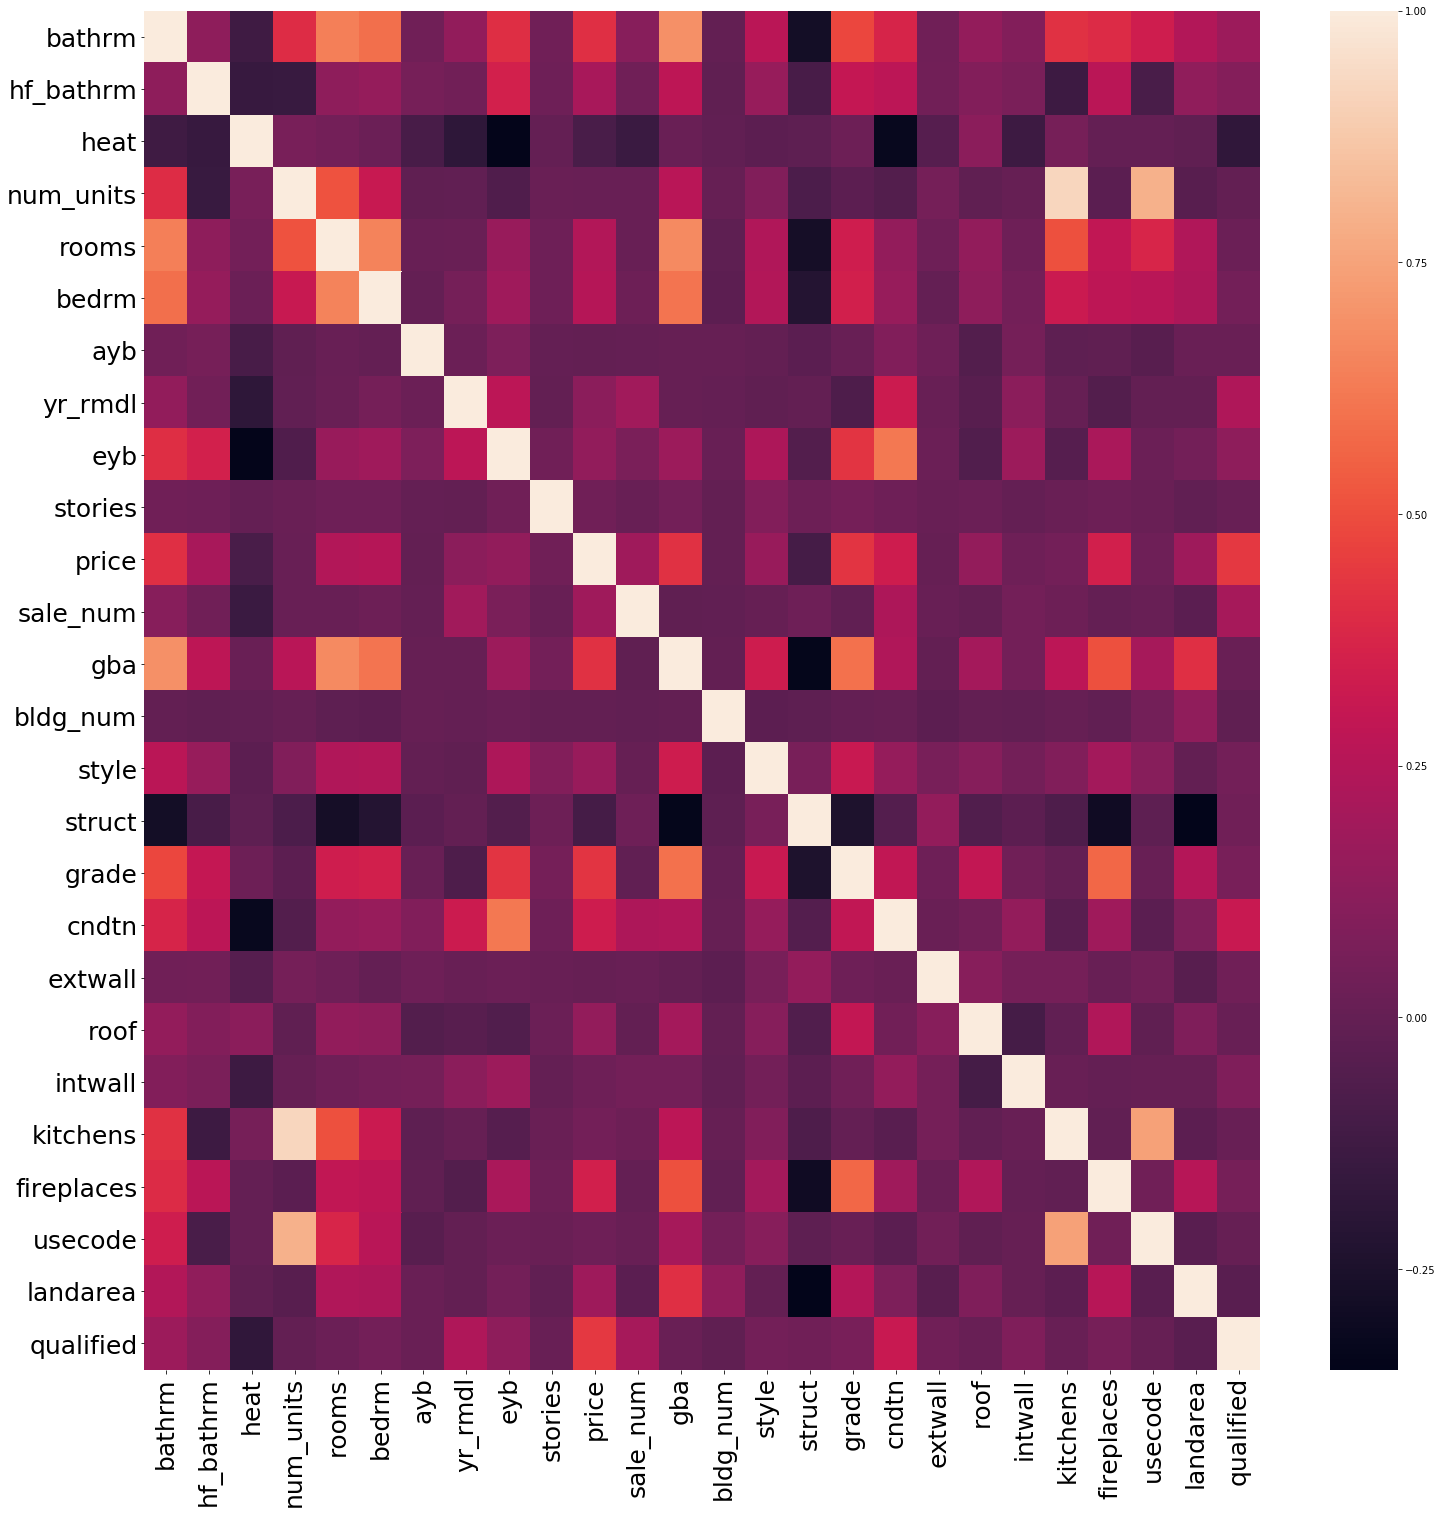

<Figure size 1440x720 with 0 Axes>

In [733]:
# Plot the Correlation Heatmap
f, ax = plt.subplots(figsize= (25,25))
sns.heatmap(correlation)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25, rotation=0)
plt.show()
plt.savefig('Correlation Matrix.png')

#### Correlation HeatMap

As you are able to see from the heatmap that some features have high degree of influence on the target variable 'Qualified' e.g. Price, sale_num, yr_rmdl etc.

We could also view the same correlation using the bar plot in Seaborn.

#### Feature Correlation Bar Plot

As you can see from the bar plot that some feature tends to go close to 1.0 which means that these features have higher influence on the target variable and some features tend to impact the model negatively. 

Please note that at this stage we are purely looking at the available features. We have yet fixed missing values and encoded categorical variables. 

Hence the heatmap and bar plot are only able to interpret select few features. 

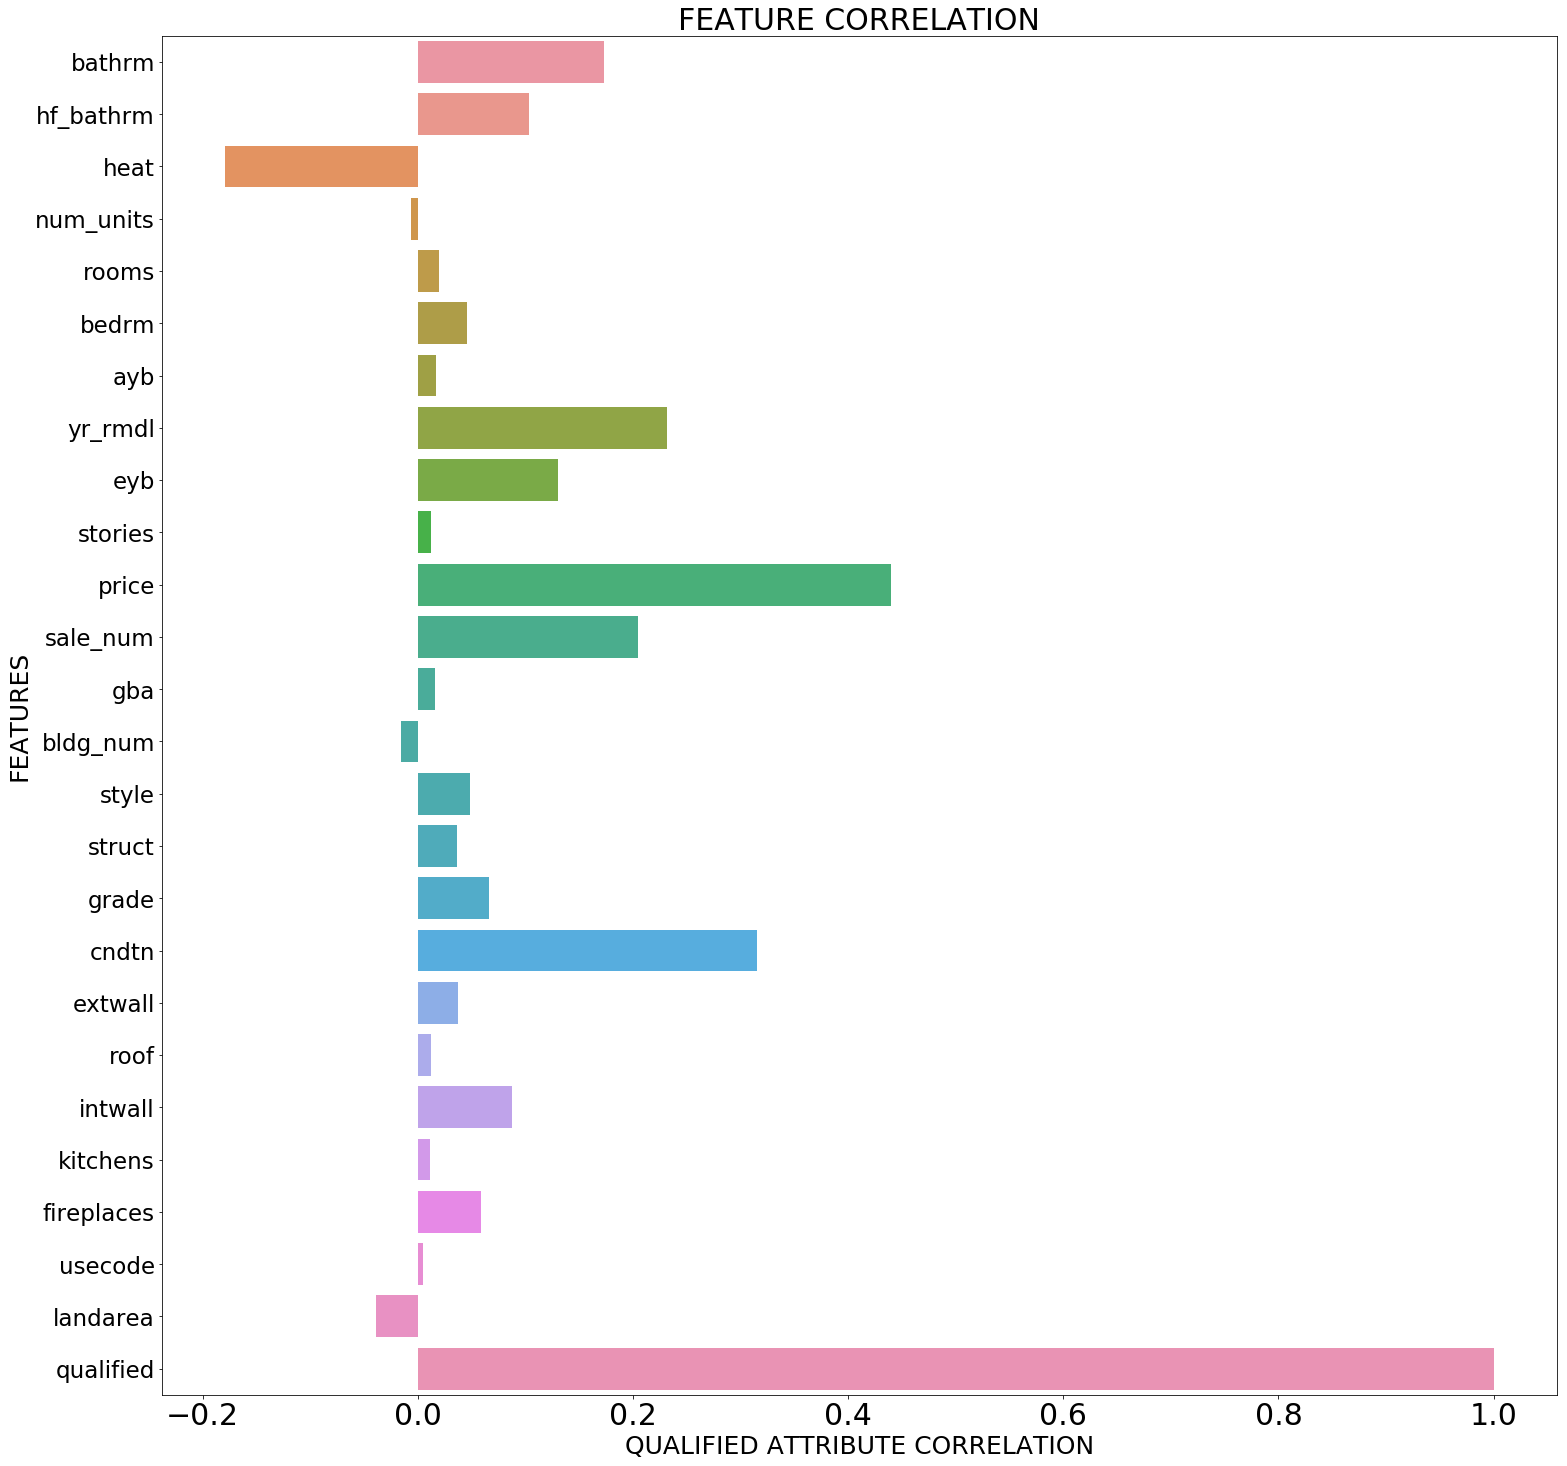

In [734]:
f, ax = plt.subplots(figsize= (25,25))
sns.barplot(x = correlation['qualified'], y = correlation.index)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 23)
plt.ylabel('FEATURES', fontsize= 25)
plt.xlabel('QUALIFIED ATTRIBUTE CORRELATION', fontsize= 25)
plt.title('FEATURE CORRELATION', fontsize =30)
plt.show()

### Feature Selection

As we mentioned in the earlier sections that some features are duplicated with numerical and categorical values, we will be dividing the dataset in two:

> 1. Dataset with numerical values. 

                > - 'bathrm' 
                > - 'hf_bathrm'
                > - 'num_units'
                > - 'rooms'
                > - 'stories'
                > - 'yr_rmdl'
                > - 'price'
                > - 'eyb'
                > - 'sale_num' 
                > - 'qualified'

For all the features where we see noticed direct correlation between numerical and categorical values, we have chosen to include the features with categorical values and apply 'One Hot Encoding' and ignore the numerical features. 

> 2. Dataset with categorical features.

                > - 'heat_d' 
                > - 'ac' 
                > - 'style_d'
                > - 'struct_d'
                > - 'grade_d'
                > - 'cndtn_d'
                > - 'extwall_d'
                > - 'roof_d'
                > - 'intwall_d'

In [735]:
#Selecting the features with numerical values
cols = ['bathrm', 'hf_bathrm', 'num_units','rooms','stories','yr_rmdl','price', 'eyb', 'sale_num', 'qualified']

In [736]:
# Selecting the features with categorical values
cols_1 = ['heat_d', 'ac', 'style_d', 'struct_d','grade_d', 'cndtn_d', 'extwall_d', 'roof_d', 'intwall_d']

In [737]:
# Extracting the dataset with selected numerical features
new_data = data[cols]

In [739]:
## Extracting the dataset with selected categorical features
new_data_1 = data[cols_1]

#### Handling Missing Values

Here we will look at the numerical features and handle the missing values. As the assignment requires us to test the model using the 'Unknown Dataset' which specific number of unique rows ID, we will not be deleting any rows with missing values. 

Rather we will try to fill these missing values with the mean values of that specific feature.

In [741]:
new_data.head()

,bathrm,hf_bathrm,num_units,rooms,stories,yr_rmdl,price,eyb,sale_num,qualified
row ID,,,,,,,,,,
Row0,3.0,1.0,2.0,11.0,3.0,2007.0,0.0,1972,1,0
Row1,3.0,1.0,2.0,9.0,3.0,2009.0,2100000.0,1984,3,1
Row2,2.0,1.0,1.0,11.0,3.0,2012.0,NaN,1985,1,0
Row3,3.0,2.0,1.0,10.0,4.0,NaN,1950000.0,1972,1,1
Row4,3.0,1.0,2.0,7.0,2.0,2008.0,1430000.0,1967,4,1


In [742]:
# Show the # of rows with missing values for each of the features
new_data.isna().sum()

bathrm          20
hf_bathrm       21
num_units       20
rooms           32
stories         52
yr_rmdl      40473
price        13506
eyb              0
sale_num         0
qualified        0
dtype: int64

In [743]:
# Filling these missing values with the mean data for the respective feature
new_data['bathrm'].fillna(new_data['bathrm'].mean(), inplace=True)
new_data['hf_bathrm'].fillna(new_data['hf_bathrm'].mean(), inplace=True)
new_data['yr_rmdl'].fillna(new_data['yr_rmdl'].mean(), inplace=True)
new_data['price'].fillna(new_data['price'].mean(), inplace=True)
new_data['num_units'].fillna(new_data['num_units'].mean(), inplace=True)
new_data['rooms'].fillna(new_data['rooms'].mean(), inplace=True)
new_data['stories'].fillna(new_data['stories'].mean(), inplace=True)

C:\Users\d641160\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [744]:
# Validationg the missing values for these features
new_data.isna().sum()

bathrm       0
hf_bathrm    0
num_units    0
rooms        0
stories      0
yr_rmdl      0
price        0
eyb          0
sale_num     0
qualified    0
dtype: int64

#### Multicategorical Features

Here we look at the multicategorical data and use the Get Dummies technique to have unique column for each category and fill the respective row with binary values.

In [745]:
new_data_1.head()

,heat_d,ac,style_d,struct_d,grade_d,cndtn_d,extwall_d,roof_d,intwall_d
row ID,,,,,,,,,
Row0,Warm Cool,Y,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood
Row1,Hot Water Rad,Y,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood
Row2,Warm Cool,Y,3 Story,Semi-Detached,Very Good,Good,Common Brick,Neopren,Hardwood
Row3,Hot Water Rad,Y,4 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood
Row4,Warm Cool,Y,2 Story,Row Inside,Above Average,Very Good,Common Brick,Built Up,Hardwood


In [746]:
final_data = pd.get_dummies(new_data_1)
final_data.head()

,heat_d_Air Exchng,heat_d_Air-Oil,heat_d_Elec Base Brd,heat_d_Electric Rad,heat_d_Evp Cool,heat_d_Forced Air,heat_d_Gravity Furnac,heat_d_Hot Water Rad,heat_d_Ht Pump,heat_d_Ind Unit,...,intwall_d_Default,intwall_d_Hardwood,intwall_d_Hardwood/Carp,intwall_d_Lt Concrete,intwall_d_Parquet,intwall_d_Resiliant,intwall_d_Terrazo,intwall_d_Vinyl Comp,intwall_d_Vinyl Sheet,intwall_d_Wood Floor
row ID,,,,,,,,,,,,,,,,,,,,,
Row0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Row1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
Row2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Row3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
Row4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [747]:
# Validating for missing values in this dataset.
final_data.isna().sum()

heat_d_Air Exchng          0
heat_d_Air-Oil             0
heat_d_Elec Base Brd       0
heat_d_Electric Rad        0
heat_d_Evp Cool            0
heat_d_Forced Air          0
heat_d_Gravity Furnac      0
heat_d_Hot Water Rad       0
heat_d_Ht Pump             0
heat_d_Ind Unit            0
heat_d_No Data             0
heat_d_Wall Furnace        0
heat_d_Warm Cool           0
heat_d_Water Base Brd      0
ac_0                       0
ac_N                       0
ac_Y                       0
style_d_1 Story            0
style_d_1.5 Story Fin      0
style_d_1.5 Story Unfin    0
style_d_2 Story            0
style_d_2.5 Story Fin      0
style_d_2.5 Story Unfin    0
style_d_3 Story            0
style_d_3.5 Story Fin      0
style_d_3.5 Story Unfin    0
style_d_4 Story            0
style_d_4.5 Story Fin      0
style_d_4.5 Story Unfin    0
style_d_Bi-Level           0
                          ..
extwall_d_Vinyl Siding     0
extwall_d_Wood Siding      0
roof_d_Built Up            0
roof_d_Clay Ti

In [748]:
#Now we will merge these two dataset to form our refined dataset to test the model
refined = pd.concat([new_data,final_data], axis=1, sort=False)

In [750]:
refined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75007 entries, Row0 to Row75006
Columns: 127 entries, bathrm to intwall_d_Wood Floor
dtypes: float64(7), int64(3), uint8(117)
memory usage: 14.7+ MB


In [751]:
#Defining the Target Variable 'y'
y = refined['qualified']

In [752]:
#Defining the Training Dataset 'X' with set # of features from 'refined' dataset.
X = refined[['bathrm',
 'hf_bathrm',
 'num_units',
 'rooms',
 'stories',
 'yr_rmdl',
 'price',
 'eyb',
 'sale_num',
 'heat_d_Air Exchng',
 'heat_d_Air-Oil',
 'heat_d_Elec Base Brd',
 'heat_d_Electric Rad',
 'heat_d_Evp Cool',
 'heat_d_Forced Air',
 'heat_d_Gravity Furnac',
 'heat_d_Hot Water Rad',
 'heat_d_Ht Pump',
 'heat_d_Ind Unit',
 'heat_d_No Data',
 'heat_d_Wall Furnace',
 'heat_d_Warm Cool',
 'heat_d_Water Base Brd',
 'ac_0',
 'ac_N',
 'ac_Y',
 'style_d_1 Story',
 'style_d_1.5 Story Fin',
 'style_d_1.5 Story Unfin',
 'style_d_2 Story',
 'style_d_2.5 Story Fin',
 'style_d_2.5 Story Unfin',
 'style_d_3 Story',
 'style_d_3.5 Story Fin',
 'style_d_3.5 Story Unfin',
 'style_d_4 Story',
 'style_d_4.5 Story Fin',
 'style_d_4.5 Story Unfin',
 'style_d_Bi-Level',
 'style_d_Default',
 'style_d_Split Foyer',
 'style_d_Split Level',
 'struct_d_Default',
 'struct_d_Multi',
 'struct_d_Row End',
 'struct_d_Row Inside',
 'struct_d_Semi-Detached',
 'struct_d_Single',
 'struct_d_Town End',
 'struct_d_Town Inside',
 'struct_d_Vacant Land',
 'grade_d_Above Average',
 'grade_d_Average',
 'grade_d_Excellent',
 'grade_d_Exceptional-A',
 'grade_d_Exceptional-B',
 'grade_d_Exceptional-C',
 'grade_d_Exceptional-D',
 'grade_d_Fair Quality',
 'grade_d_Good Quality',
 'grade_d_Low Quality',
 'grade_d_No Data',
 'grade_d_Superior',
 'grade_d_Very Good',
 'cndtn_d_Average',
 'cndtn_d_Default',
 'cndtn_d_Excellent',
 'cndtn_d_Fair',
 'cndtn_d_Good',
 'cndtn_d_Poor',
 'cndtn_d_Very Good',
 'extwall_d_Aluminum',
 'extwall_d_Brick Veneer',
 'extwall_d_Brick/Siding',
 'extwall_d_Brick/Stone',
 'extwall_d_Brick/Stucco',
 'extwall_d_Common Brick',
 'extwall_d_Concrete',
 'extwall_d_Concrete Block',
 'extwall_d_Default',
 'extwall_d_Face Brick',
 'extwall_d_Hardboard',
 'extwall_d_Metal Siding',
 'extwall_d_Plywood',
 'extwall_d_Shingle',
 'extwall_d_Stone',
 'extwall_d_Stone Veneer',
 'extwall_d_Stone/Siding',
 'extwall_d_Stone/Stucco',
 'extwall_d_Stucco',
 'extwall_d_Stucco Block',
 'extwall_d_Vinyl Siding',
 'extwall_d_Wood Siding',
 'roof_d_Built Up',
 'roof_d_Clay Tile',
 'roof_d_Comp Shingle',
 'roof_d_Composition Ro',
 'roof_d_Concrete Tile',
 'roof_d_Metal- Cpr',
 'roof_d_Metal- Pre',
 'roof_d_Metal- Sms',
 'roof_d_Neopren',
 'roof_d_Shake',
 'roof_d_Shingle',
 'roof_d_Slate',
 'roof_d_Typical',
 'roof_d_Water Proof',
 'roof_d_Wood- FS',
 'intwall_d_Carpet',
 'intwall_d_Ceramic Tile',
 'intwall_d_Default',
 'intwall_d_Hardwood',
 'intwall_d_Hardwood/Carp',
 'intwall_d_Lt Concrete',
 'intwall_d_Parquet',
 'intwall_d_Resiliant',
 'intwall_d_Terrazo',
 'intwall_d_Vinyl Comp',
 'intwall_d_Vinyl Sheet',
 'intwall_d_Wood Floor']]

#### Importing the Test Dataset

As you can see from the previous command that the 'refined' dataset now has 127 features. We will need to ensure that our test dataset 'Unknown Dataset' also has similar features. This is critical as we will be training our classification model on the set number of features and in order to test our model on a seperate test dataset, the dataset needs to have equal number of features. 

In [753]:
#Import the test dataset
new_test = pd.read_csv('Assignment-UnknownDataset.csv',index_col=0)

In [754]:
# Lowering the column names for convenience
new_test.columns = [name.lower() for name in new_test.columns]

In [755]:
#Similar to the training dataset, splitting the features to pre-process different categories of features
new_cols = ['bathrm', 'hf_bathrm', 'num_units','rooms','stories','yr_rmdl','price', 'eyb', 'sale_num']
new_cols_1 = ['heat_d', 'ac', 'style_d', 'struct_d','grade_d', 'cndtn_d', 'extwall_d', 'roof_d', 'intwall_d']

In [756]:
# Defining individual datasets with select features
select_test = new_test[new_cols]
select_test1 = new_test[new_cols_1]

In [757]:
# Testing the dateset for missing values
select_test.isna().sum()

bathrm           7
hf_bathrm        7
num_units        7
rooms           12
stories         22
yr_rmdl      17235
price         5782
eyb              0
sale_num         0
dtype: int64

In [758]:
# Fixing the missing values with mean values for the respective feature
select_test['bathrm'].fillna(select_test['bathrm'].mean(), inplace=True)
select_test['hf_bathrm'].fillna(select_test['hf_bathrm'].mean(), inplace=True)
select_test['yr_rmdl'].fillna(select_test['yr_rmdl'].mean(), inplace=True)
select_test['price'].fillna(select_test['price'].mean(), inplace=True)
select_test['num_units'].fillna(select_test['num_units'].mean(), inplace=True)
select_test['rooms'].fillna(select_test['rooms'].mean(), inplace=True)
select_test['stories'].fillna(select_test['stories'].mean(), inplace=True)

In [759]:
# Validating the previous step
select_test.isna().sum()

bathrm       0
hf_bathrm    0
num_units    0
rooms        0
stories      0
yr_rmdl      0
price        0
eyb          0
sale_num     0
dtype: int64

In [760]:
# Checking the other dataset with categorical features
select_test1.head()

,heat_d,ac,style_d,struct_d,grade_d,cndtn_d,extwall_d,roof_d,intwall_d
row ID,,,,,,,,,
Row0,Warm Cool,Y,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood
Row1,Hot Water Rad,Y,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood
Row2,Warm Cool,Y,2 Story,Row Inside,Above Average,Average,Common Brick,Metal- Sms,Hardwood
Row3,Hot Water Rad,Y,3 Story,Row Inside,Very Good,Average,Common Brick,Metal- Sms,Hardwood
Row4,Hot Water Rad,Y,2 Story,Row Inside,Good Quality,Average,Common Brick,Built Up,Hardwood


In [761]:
# Applying the get Dummies method to create individual columns for each category of feature
new_select_test1 = pd.get_dummies(select_test1)

In [762]:
# Validating the previous step
new_select_test1.head()

,heat_d_Air Exchng,heat_d_Air-Oil,heat_d_Elec Base Brd,heat_d_Electric Rad,heat_d_Evp Cool,heat_d_Forced Air,heat_d_Gravity Furnac,heat_d_Hot Water Rad,heat_d_Ht Pump,heat_d_Ind Unit,...,intwall_d_Default,intwall_d_Hardwood,intwall_d_Hardwood/Carp,intwall_d_Lt Concrete,intwall_d_Parquet,intwall_d_Resiliant,intwall_d_Terrazo,intwall_d_Vinyl Comp,intwall_d_Vinyl Sheet,intwall_d_Wood Floor
row ID,,,,,,,,,,,,,,,,,,,,,
Row0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Row1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
Row2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Row3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
Row4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [763]:
# Merging both the test datasets test1 = pd.concat([select_test,new_select_test1],axis=1,sort=False)

In [764]:
# Generating the list of columns to match with the training datset
list(test1.columns)

['bathrm',
 'hf_bathrm',
 'num_units',
 'rooms',
 'stories',
 'yr_rmdl',
 'price',
 'eyb',
 'sale_num',
 'heat_d_Air Exchng',
 'heat_d_Air-Oil',
 'heat_d_Elec Base Brd',
 'heat_d_Electric Rad',
 'heat_d_Evp Cool',
 'heat_d_Forced Air',
 'heat_d_Gravity Furnac',
 'heat_d_Hot Water Rad',
 'heat_d_Ht Pump',
 'heat_d_Ind Unit',
 'heat_d_No Data',
 'heat_d_Wall Furnace',
 'heat_d_Warm Cool',
 'heat_d_Water Base Brd',
 'ac_0',
 'ac_N',
 'ac_Y',
 'style_d_1 Story',
 'style_d_1.5 Story Fin',
 'style_d_1.5 Story Unfin',
 'style_d_2 Story',
 'style_d_2.5 Story Fin',
 'style_d_2.5 Story Unfin',
 'style_d_3 Story',
 'style_d_3.5 Story Fin',
 'style_d_3.5 Story Unfin',
 'style_d_4 Story',
 'style_d_4.5 Story Fin',
 'style_d_4.5 Story Unfin',
 'style_d_Bi-Level',
 'style_d_Default',
 'style_d_Split Foyer',
 'style_d_Split Level',
 'struct_d_Default',
 'struct_d_Multi',
 'struct_d_Row End',
 'struct_d_Row Inside',
 'struct_d_Semi-Detached',
 'struct_d_Single',
 'struct_d_Town End',
 'struct_d_Town In

In [765]:
test1.head()

,bathrm,hf_bathrm,num_units,rooms,stories,yr_rmdl,price,eyb,sale_num,heat_d_Air Exchng,...,intwall_d_Hardwood,intwall_d_Hardwood/Carp,intwall_d_Lt Concrete,intwall_d_Parquet,intwall_d_Resiliant,intwall_d_Terrazo,intwall_d_Vinyl Comp,intwall_d_Vinyl Sheet,intwall_d_Wood Floor,Predict-Qualified
row ID,,,,,,,,,,,,,,,,,,,,,
Row0,4.0,0.0,2.0,8.0,3.0,1988.0,1095000.0,1972,1,0,...,1,0,0,0,0,0,0,0,0,1
Row1,3.0,1.0,2.0,8.0,3.0,2003.0,1602000.0,1984,1,0,...,1,0,0,0,0,0,0,0,0,1
Row2,1.0,0.0,2.0,5.0,2.0,1988.0,0.0,1957,1,0,...,1,0,0,0,0,0,0,0,0,0
Row3,3.0,1.0,2.0,8.0,3.0,2011.0,1050000.0,1972,1,0,...,1,0,0,0,0,0,0,0,0,1
Row4,1.0,1.0,1.0,6.0,2.0,1979.0,0.0,1950,1,0,...,1,0,0,0,0,0,0,0,0,0


In [766]:
# Performing the Correlation Matrix checks on the refined dataset
correlation = refined.corr()

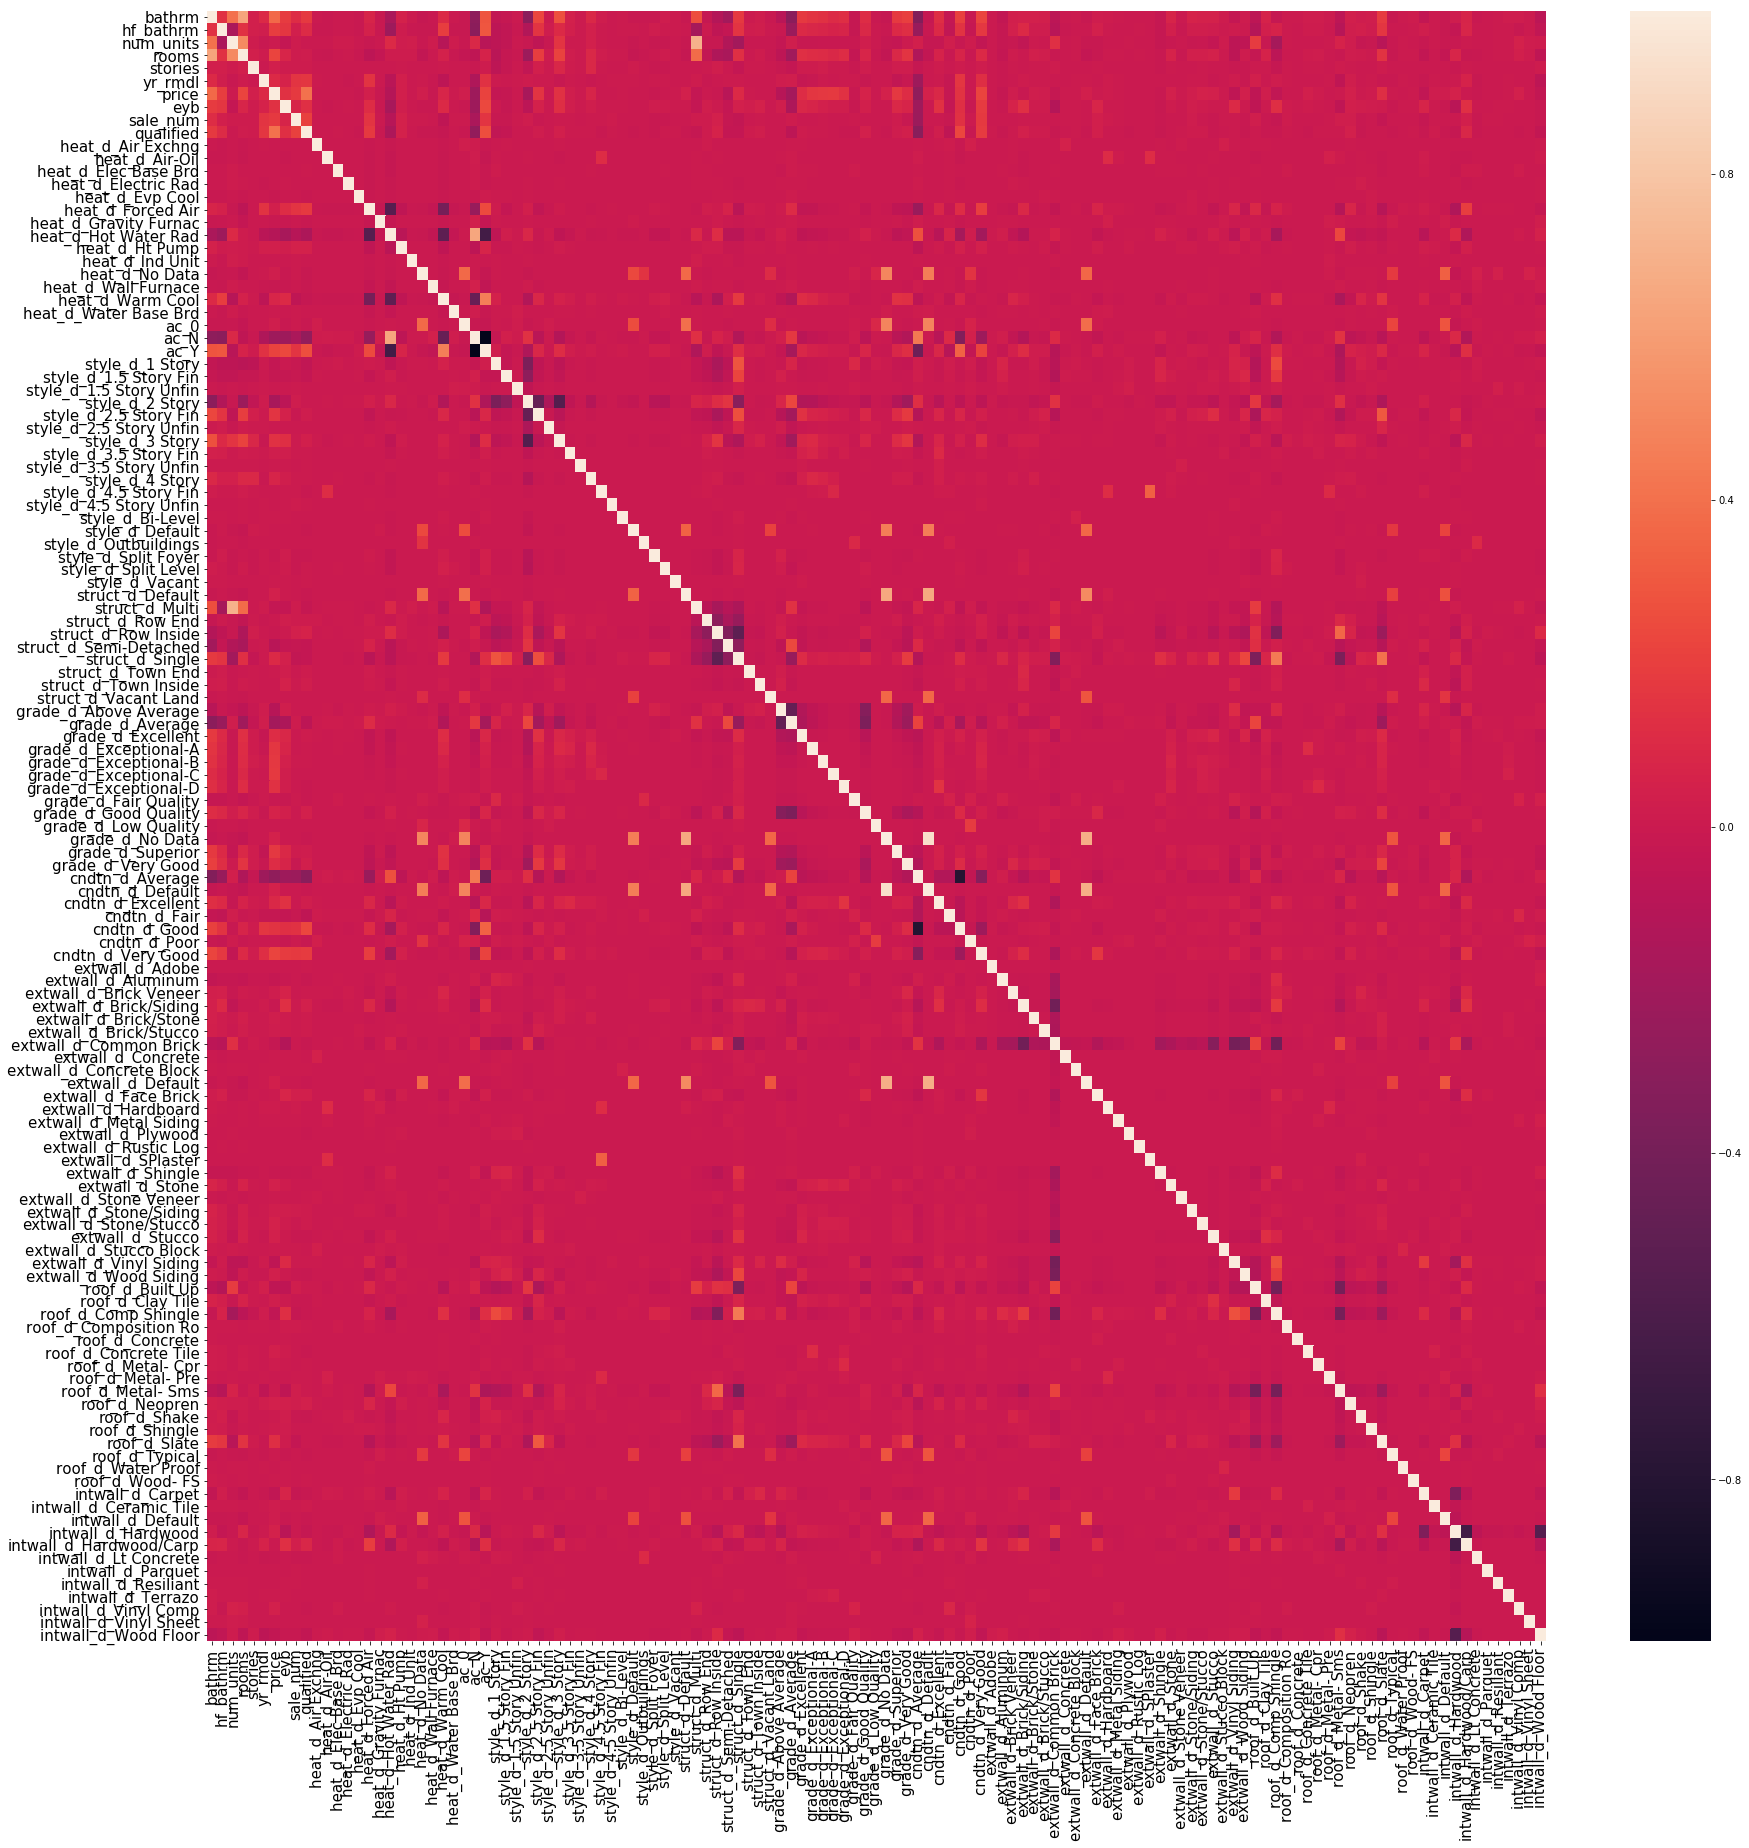

<Figure size 1440x720 with 0 Axes>

In [767]:
f, ax = plt.subplots(figsize= (30,30))
sns.heatmap(correlation)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()
plt.savefig('Correlation Matrix.png')

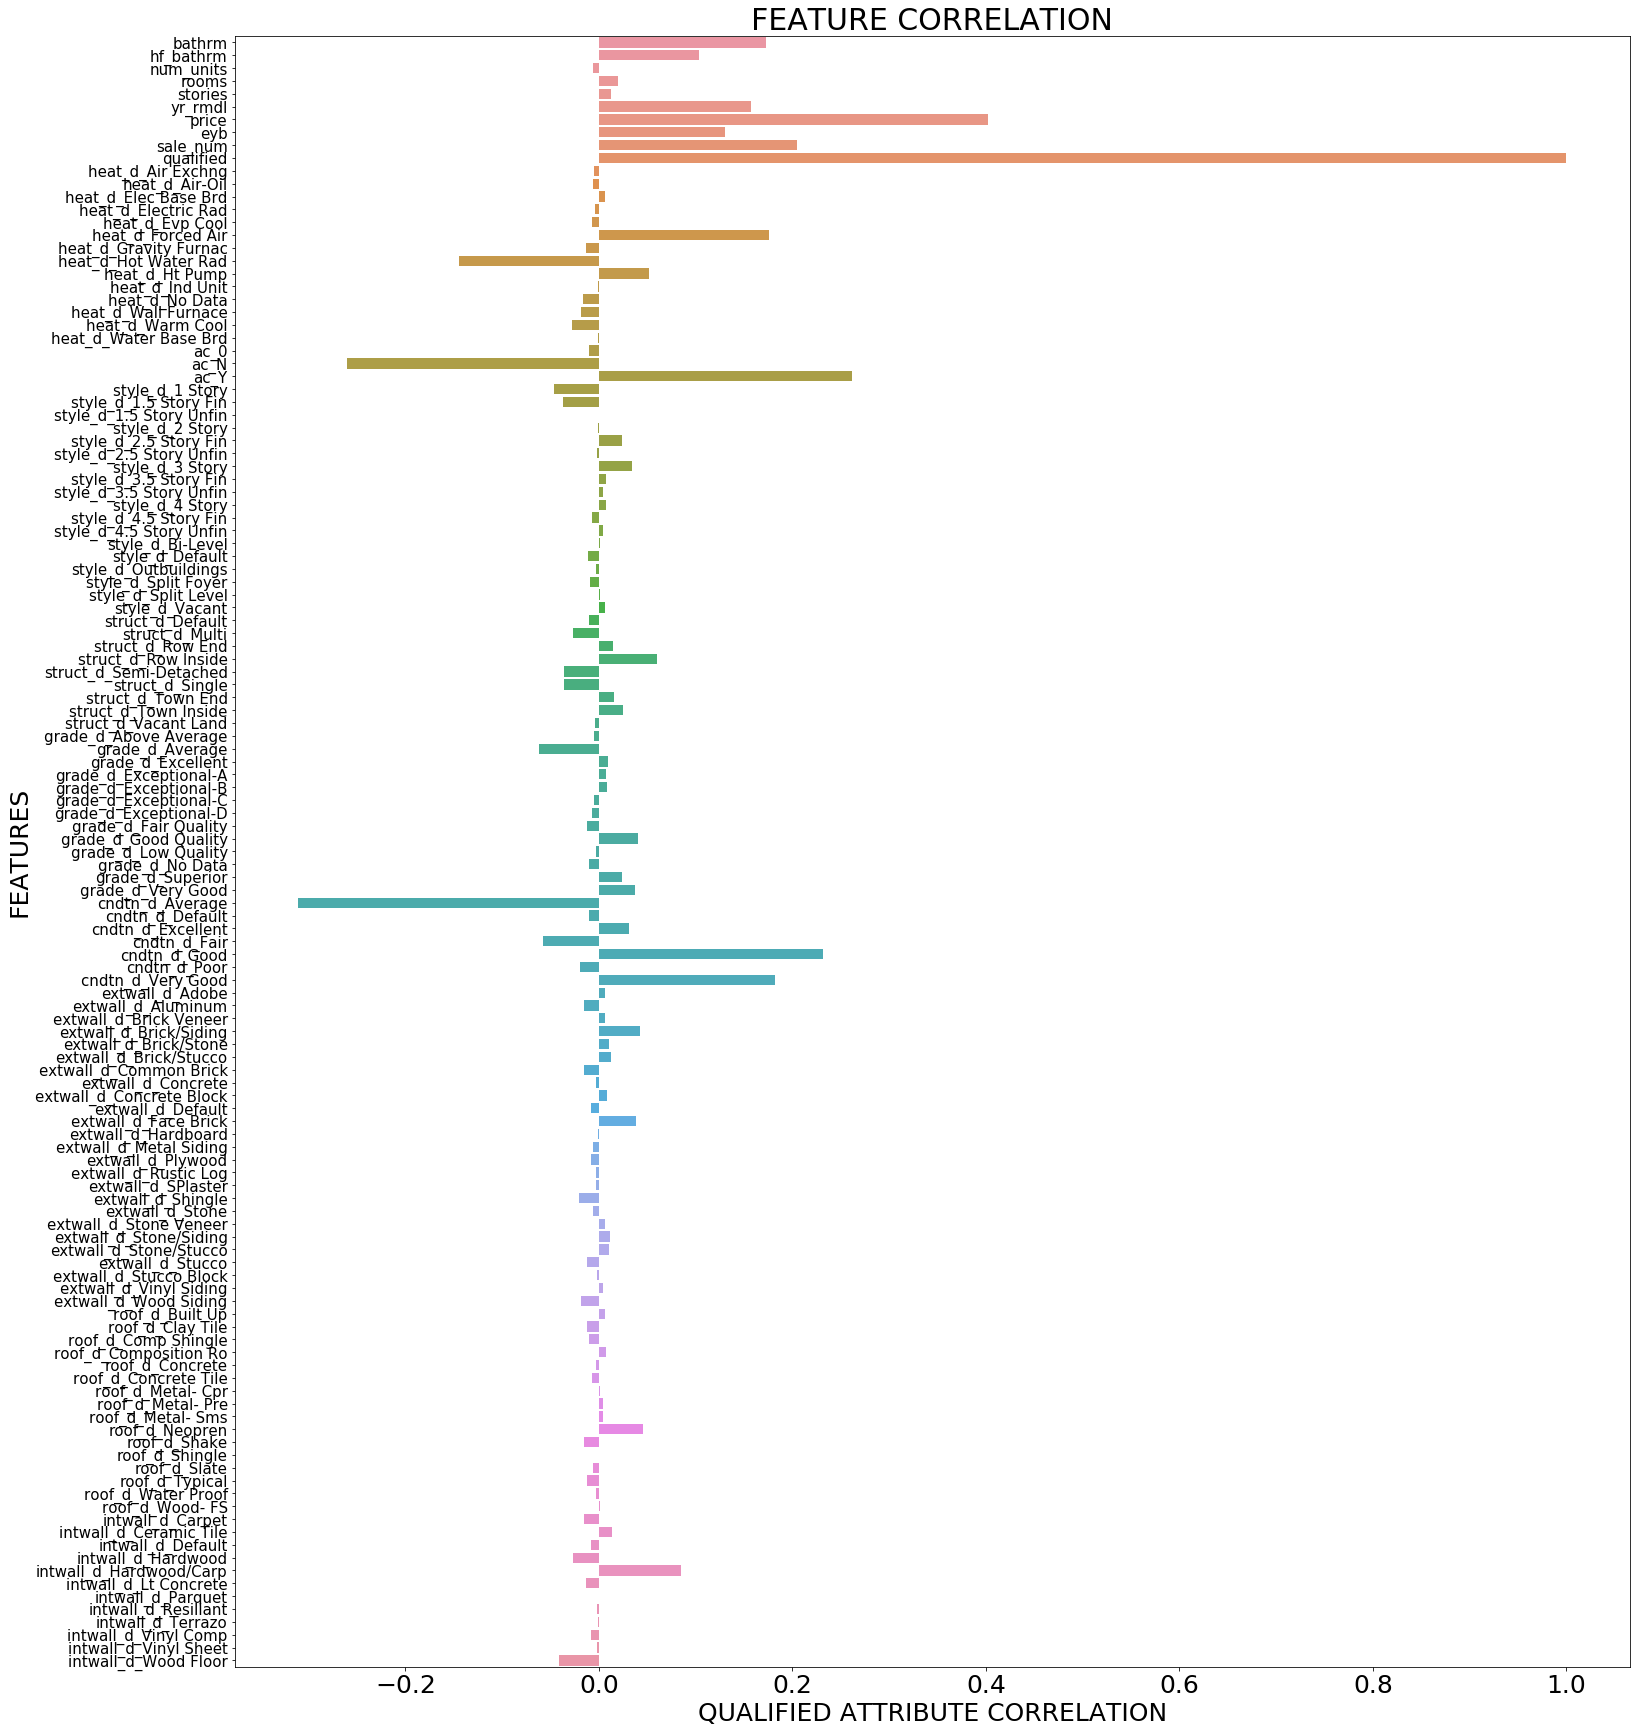

In [768]:
f, ax = plt.subplots(figsize= (25,30))
sns.barplot(x = correlation['qualified'], y = correlation.index)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 15)
plt.ylabel('FEATURES', fontsize= 25)
plt.xlabel('QUALIFIED ATTRIBUTE CORRELATION', fontsize= 25)
plt.title('FEATURE CORRELATION', fontsize =30)
plt.show()

## 4. Predictive Model Building

In this section we will build different Classifiers and train them using the training dataset 'refined'.

There are various methods of building machine learning models to predict data.  We will be using different __Ensemble Classiication Models and Random Forest Classification__ techniques to build train our model. 

#### What is an ensemble method?
Ensemble is a Machine Learning concept in which the idea is to train multiple models using the same learning algorithm. The ensembles take part in a bigger group of methods, called multiclassifiers, where a set of hundreds or thousands of learners with a common objective are fused together to solve the problem.

The second group of multiclassifiers contain the hybrid methods. They use a set of learners too, but they can be trained using different learning techniques. Stacking is the most well-known. If you want to learn more about Stacking, you can read my previous post, “Dream team combining classifiers“.

The main causes of error in learning are due to noise, bias and variance. Ensemble helps to minimize these factors. These methods are designed to improve the stability and the accuracy of Machine Learning algorithms. Combinations of multiple classifiers decrease variance, especially in the case of unstable classifiers, and may produce a more reliable classification than a single classifier.

[More Information on Ensemble Methods](https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/)

#### What is Boosting?

Boosting is a method of converting a set of weak learners into strong learners. Suppose we have a binary classification task. A weak learner has an error rate that is slightly lesser than 0.5 in classifying the object, i.e the weak learner is slightly better than deciding from a coin toss. A strong learner has an error rate closer to 0. To convert a weak learner into strong learner, we take a family of weak learners, combine them and vote. This turns this family of weak learners into strong learners.

#### AdaBoost(Adaptive Boosting):

The Adaptive Boosting technique was formulated by Yoav Freund and Robert Schapire, who won the Gödel Prize for their work. AdaBoost works on improving the areas where the base learner fails. The base learner is a machine learning algorithm which is a weak learner and upon which the boosting method is applied to turn it into a strong learner. Any machine learning algorithm that accept weights on training data can be used as a base learner. In the example taken below, Decision stumps are used as the base learner.

We take the training data and randomly sample points from this data and apply decision stump algorithm to classify the points. After classifying the sampled points we fit the decision tree stump to the complete training data. This process iteratively happens until the complete training data fits without any error or until a specified maximum number of estimators.

[More Information on Adaptive Boosting](https://hackernoon.com/boosting-algorithms-adaboost-gradient-boosting-and-xgboost-f74991cad38c)

#### Gradient Boosting:

Gradient Boosting is also a boosting algorithm(Duh!), hence it also tries to create a strong learner from an ensemble of weak learners. This is algorithm is similar to Adaptive Boosting(AdaBoost) but differs from it on certain aspects. In this method we try to visualise the boosting problem as an optimisation problem, i.e we take up a loss function and try to optimise it. We take up a weak learner(in previous case it was decision stump) and at each step, we add another weak learner to increase the performance and build a strong learner. This reduces the loss of the loss function. We iteratively add each model and compute the loss. The loss represents the error residuals(the difference between actual value and predicted value) and using this loss value the predictions are updated to minimise the residuals.

[More Information on Gradient Boosting](https://medium.com/hackernoon/gradient-boosting-and-xgboost-90862daa6c77)

### What is Bagging?

Bootstrap Aggregation (or Bagging for short), is a simple and very powerful ensemble method. Bagging is the application of the Bootstrap procedure to a high-variance machine learning algorithm, typically decision trees. Suppose there are N observations and M features. A sample from observation is selected randomly with replacement(Bootstrapping). A subset of features are selected to create a model with sample of observations and subset of features. Feature from the subset is selected which gives the best split on the training data. This is repeated to create many models and every model is trained in parallel
Prediction is given based on the aggregation of predictions from all the models.

[More information on Bagging](https://becominghuman.ai/ensemble-learning-bagging-and-boosting-d20f38be9b1e)

#### Random Forest Classification:
Random forest is an ensemble model using bagging as the ensemble method and decision tree as the individual model. Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

[More information on Random Forest Classification](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed)

#### Decision Tree Classification

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

[More information on Decision Tree Classification](https://www.datacamp.com/community/tutorials/decision-tree-classification-python)

Firstly we will need to split the training dataset into train and test sets to validate the model accuracy. 

Then we will call the sci-kit learn's inbuilt library function to instanstiate the both the classifier model, fit the training data and predict the target variable class. 

In [769]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size= 0.25)

#### Different Classifiers

As you can see below that we will use the test and train datasets across to build various classifier models. 

In [568]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

RF = RandomForestClassifier(n_estimators = 100)
RF.fit(X_train, y_train)
RF.predict(X_test)

ABC = AdaBoostClassifier(n_estimators = 100)
ABC.fit(X_train, y_train)
ABC.predict(X_test)

GBC = GradientBoostingClassifier(n_estimators = 100)
GBC.fit(X_train, y_train)
GBC.predict(X_test)

DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
DTC.predict(X_test)

ETC = ExtraTreesClassifier(n_estimators = 100)
ETC.fit(X_train, y_train)
ETC.predict(X_test)

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

## 5. Validating Model Accuracy

Now we will validate the individual Classifiers performance by checking their Accuracy score.

In [572]:
print("Random Forest Model Accuracy Score:", RF.score(X_test, y_test))

Random Forest Model Accuracy Score: 0.8716403583617748


In [573]:
print("Adaptive Boosting Model Accuracy Score:", ABC.score(X_test, y_test))

Adaptive Boosting Model Accuracy Score: 0.8921181740614335


In [574]:
print("Gradient Boosting Model Accuracy Score:", GBC.score(X_test, y_test))

Gradient Boosting Model Accuracy Score: 0.8959577645051194


In [575]:
print("Decision Tree Model Accuracy Score:", DTC.score(X_test, y_test))

Decision Tree Model Accuracy Score: 0.8556420648464164


In [576]:
print("Extra Trees Model Accuracy Score:", ETC.score(X_test, y_test))

Extra Trees Model Accuracy Score: 0.8165529010238908


## 6. Model Improvement using GridSearch and Recursive Feature Elimination

Now here we can see that our accuracy score is different across different models. Gradient Boosting Classifier seems to be giving us the highest accuracy of 89.59%.

We will try to further improve the performance of this Classifier using Feature Ranking techniques such as Recursive Feature Elimination and Cross-Validated Selection of the best number of features.

This involves the following steps. 

    > 1. Rank the features
    > 2. Cross validate the top(selected) features
    > 3. Train the Gradient Boosting Classifier on Recursive Feature Elimination & Cross Validation (RFECV)
    > 4. Select the best parameters using Grid Search and Cross Validation
    > 5. Train the Classifier with the best parameters
    > 6. Validate Model Accuracy
    > 6. Test the 'Unknown Dataset' with the Improved Model
    
 [More information on RFECV](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html)

In [578]:
feature_importance = GBC.feature_importances_
feature_importance

array([1.59497860e-03, 1.35017223e-04, 8.67207799e-04, 1.61091637e-03,
       1.76045275e-04, 2.04046120e-03, 9.75049048e-01, 5.88008262e-03,
       2.62721518e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.53387143e-05, 0.00000000e+00, 9.13038169e-05, 0.00000000e+00,
       7.64995389e-05, 0.00000000e+00, 3.43515674e-05, 0.00000000e+00,
       0.00000000e+00, 1.06748645e-05, 0.00000000e+00, 1.21191845e-04,
       0.00000000e+00, 8.43185841e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.22314028e-04, 0.00000000e+00, 0.00000000e+00,
       4.72867845e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.75705562e-07, 0.00000000e+00, 0.00000000e+00, 5.88891023e-05,
       7.39858500e-05, 5.34891764e-05, 6.11902402e-04, 6.65296137e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.46999144e-04,
       2.95864042e-04, 9.78624634e-06, 2.25697291e-05, 0.00000000e+00,
      

In [579]:
coef_df = pd.DataFrame({'features': X.columns, 'values': feature_importance})

In [580]:
coef_df.nlargest(100, 'values')

,features,values
6,price,0.975049
7,eyb,0.005880
64,cndtn_d_Average,0.003406
8,sale_num,0.002627
5,yr_rmdl,0.002040
3,rooms,0.001611
0,bathrm,0.001595
67,cndtn_d_Fair,0.001550
2,num_units,0.000867
25,ac_Y,0.000843


In [581]:
cv = ShuffleSplit(n_splits = 3, test_size=0.25, random_state=0)

In [582]:
selector = RFECV(GBC, cv=cv)

In [583]:
selector.fit(X_train, y_train)

RFECV(cv=ShuffleSplit(n_splits=3, random_state=0, test_size=0.25, train_size=None),
   estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

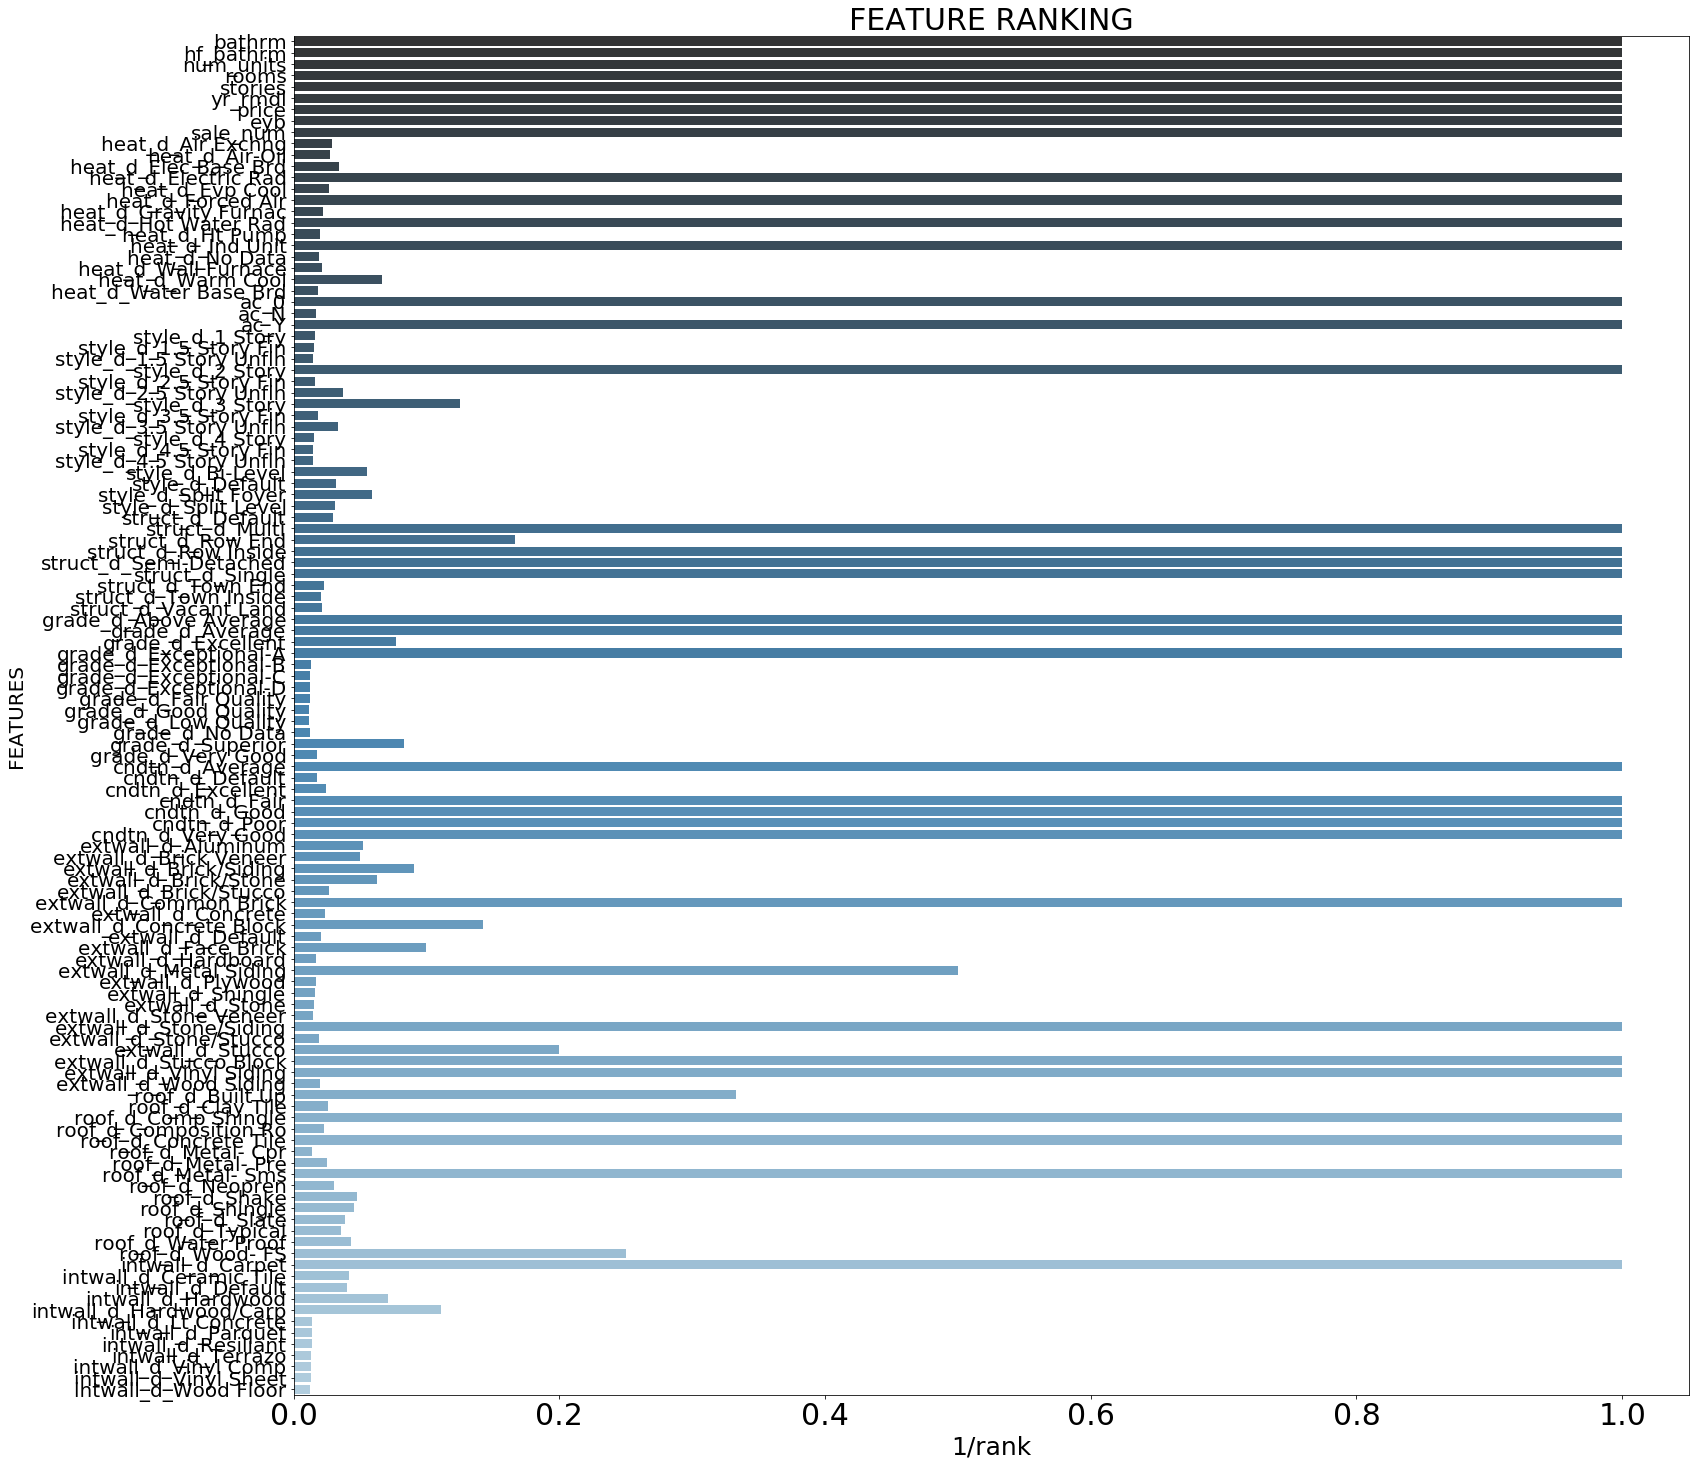

In [584]:
f, ax = plt.subplots(figsize= (25,25))
sns.barplot(x = (1/selector.ranking_), y = X_train.columns, palette="Blues_d")
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 20)
plt.xlabel('1/rank', fontsize= 25)
plt.ylabel('FEATURES', fontsize= 20)
plt.title('FEATURE RANKING', fontsize =30)
plt.show()

In [586]:
sr = pd.DataFrame(selector.ranking_)
rd = (pd.DataFrame(X_train.columns),sr)
ers_features = pd.concat(rd, axis = 1 )

In [587]:
ers_csv = ers_features.to_csv(r'C:\Users\d641160\OneDrive - Telstra\Advanced Data Analytics - UTS\Assignment\ers_features.csv')

In [588]:
my_params= { 
             'learning_rate' : [0.1, 0.01],
             'max_depth' : [6, 4, 5],
            'n_estimators' : [150, 160, 140]
             
}

In [591]:
gbcgs = GridSearchCV(GBC, my_params, cv =cv)
gbcgs.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=0, test_size=0.25, train_size=None),
       error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [6, 4, 5], 'n_estimators': [150, 160, 140]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [592]:
gbcgs.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150}

In [594]:
gbcgs.best_estimator_.score(X_train, y_train)

0.9130210647942405

As you are able to see from the above steps that our if we use the best parameters our model accuracy will be around 91.3%. Now we will train the improved model with existing dataset and then validate the accuracy. We will also check for Median error % on the test dataset.

In [606]:
GBC1 = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 6, n_estimators = 150)
GBC1.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=150,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [607]:
GBC1.score(X_train, y_train)

0.9133232601546529

In [608]:
median_absolute_error(GBC1.predict(X_test),y_test)

0.0

#### Plotting Model Performance

In the next steps we will try to plot how our model behaved on training and cross validation dataset and how the accuracy score improved across the entire dataset and how we ended up with improved accuracy.

We will also then plot the difference between Actual and Predicted values on very few selected samples. However since we only have two classes in the target variable it is not much of a significance here. 

In [609]:
tra_sizes, tra_scores, test_scores = learning_curve(GBC1, X, y,cv = cv)

In [610]:
tra_smean = np.mean(tra_scores, axis=1)
test_smean = np.mean(test_scores, axis=1)

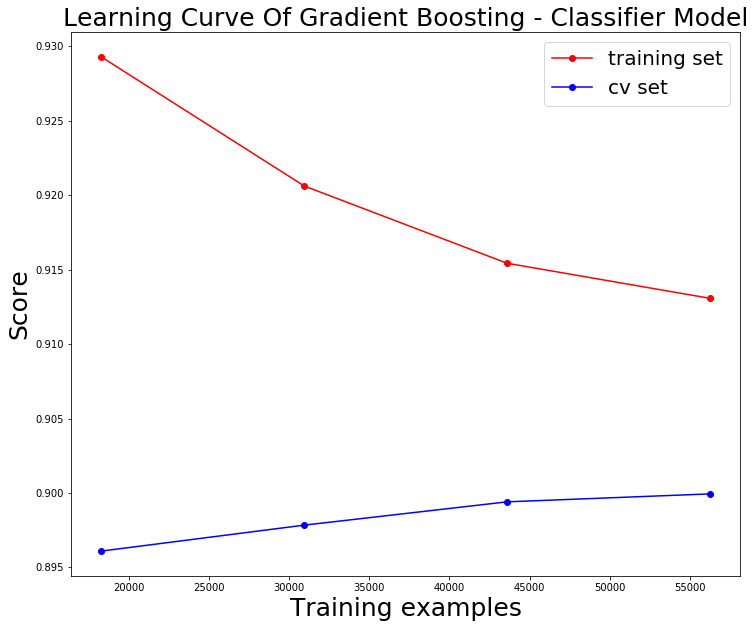

<Figure size 1440x720 with 0 Axes>

In [611]:
plt.figure(figsize=(12,10))
plt.title("Learning Curve Of Gradient Boosting - Classifier Model", fontsize = 25)
plt.xlabel("Training examples", fontsize= 25)
plt.ylabel("Score", fontsize = 25)
plt.plot(tra_sizes[1:5], tra_smean[1:5], 'o-', color = 'r', label = "training set")
plt.plot(tra_sizes[1:5], test_smean[1:5], 'o-', color = 'b', label = "cv set")
plt.legend(fontsize = 20)
plt.show()
plt.savefig('Learning Curve of Gradient Boosting Classifier Model.png')

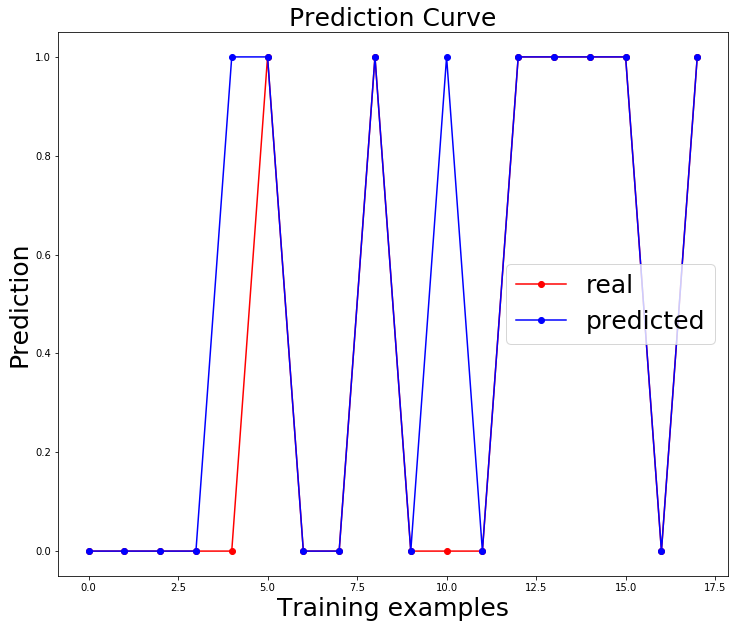

In [771]:
plt.figure(figsize=(12,10))
plt.title("Prediction Curve", fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[2:20].reset_index().index, y_test[2:20], 'o-', color = 'r', label = 'real')
plt.plot(X_test[2:20].reset_index().index, GBC1.predict(X_test)[2:20] , 'o-', color = 'b', label = "predicted")
plt.legend(fontsize = 25)
plt.show()

## 7. Apply the Improved Model on Unknown Test Dataset

Now in this final step, we use the Improved Gradient Boosting Classifier on the Unknown Test Dataset from Kaggle. We will add 'Predict-Qualified' column to show the predicted Class for each row ID. We will then export the final test dataset into csv format for submission to UTS and Kaggle. 

In [681]:
test1['Predict-Qualified'] = GBC1.predict(test1)

In [682]:
test1.head()

,bathrm,hf_bathrm,num_units,rooms,stories,yr_rmdl,price,eyb,sale_num,heat_d_Air Exchng,...,intwall_d_Hardwood,intwall_d_Hardwood/Carp,intwall_d_Lt Concrete,intwall_d_Parquet,intwall_d_Resiliant,intwall_d_Terrazo,intwall_d_Vinyl Comp,intwall_d_Vinyl Sheet,intwall_d_Wood Floor,Predict-Qualified
row ID,,,,,,,,,,,,,,,,,,,,,
Row0,4.0,0.0,2.0,8.0,3.0,1988.0,1095000.0,1972,1,0,...,1,0,0,0,0,0,0,0,0,1
Row1,3.0,1.0,2.0,8.0,3.0,2003.0,1602000.0,1984,1,0,...,1,0,0,0,0,0,0,0,0,1
Row2,1.0,0.0,2.0,5.0,2.0,1988.0,0.0,1957,1,0,...,1,0,0,0,0,0,0,0,0,0
Row3,3.0,1.0,2.0,8.0,3.0,2011.0,1050000.0,1972,1,0,...,1,0,0,0,0,0,0,0,0,1
Row4,1.0,1.0,1.0,6.0,2.0,1979.0,0.0,1950,1,0,...,1,0,0,0,0,0,0,0,0,0


In [772]:
export_csv = test1.to_csv(r'C:\Users\d641160\OneDrive - Telstra\Advanced Data Analytics - UTS\Assignment\Assignment-TestDataset_GBC1.csv')

Please feel free to visit the Github Link for better viewing experience

[Github Link](https://github.com/minesh16/UTS-Advanced-Data-Analytics-Assignment)

Thank you UTS MicroCredential team for your support on this course. 